## Detecting fake news With Python

Importing Necessaray libraries

In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


Reading the data

In [2]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
print(data.shape)

(6335, 4)


In [4]:
labels=data['label']
print(labels.head())

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object


In [5]:
data['title'][1]

'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'

In [6]:
data['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

Changing the label data which is categorical into numerical data where FAKE=1 and REAL=0. 

In [7]:
data['label']=np.where(data['label']=='FAKE',1,0)

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 198.1+ KB


In [34]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
data.describe()

,Unnamed: 0,label
count,6335.000000,6335.000000
mean,5280.415627,0.499448
std,3038.503953,0.500039
min,2.000000,0.000000
25%,2674.500000,0.000000
50%,5271.000000,0.000000
75%,7901.000000,1.000000
max,10557.000000,1.000000


In [11]:
data.groupby('label').describe()

Unnamed: 0                            ...                          
           count         mean          std  ...     50%      75%      max
label                                       ...                          
0         3171.0  2654.344056  1531.720152  ...  2676.0  3992.50   5276.0
1         3164.0  7912.297092  1514.701524  ...  7904.0  9231.25  10557.0

[2 rows x 8 columns]

In [12]:
data['label'].count()

6335

Data Seems to be balanced

In [13]:
data['label'].mean()*100

49.94475138121547

Text(0.5, 1.0, 'Total Count of Fake and Real News')

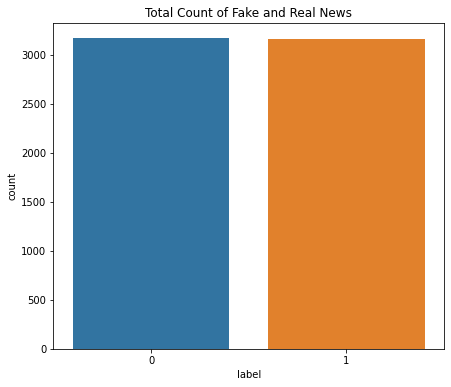

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
sns.countplot(x='label',data=data)
plt.title('Total Count of Fake and Real News')

Splitting the Data into train and test set

In [15]:
X_train,X_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2,random_state=5)

Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [16]:
tfid=TfidfVectorizer(stop_words='english',max_df=0.7)

tfid_xtrain=tfid.fit_transform(X_train)
tfid_xtest=tfid.transform(X_test)

Initilizing passiveaggressive classifier

In [17]:
pac=PassiveAggressiveClassifier()
pac.fit(tfid_xtrain,y_train)
pred_train=pac.predict(tfid_xtrain)
pred_test=pac.predict(tfid_xtest)
score_training=accuracy_score(pred_train,y_train)
score_testing=accuracy_score(pred_test,y_test)

In [18]:
print('Training score:{}'.format(score_training))
print('Testing score:{}'.format(score_testing))

Training score:1.0
Testing score:0.9447513812154696


In [19]:
score_training

1.0

In [20]:
score_testing

0.9447513812154696

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters={'C':[0.01,0.1,1,10]}
clf=GridSearchCV(estimator=PassiveAggressiveClassifier(),param_grid=parameters)

In [23]:
clf.fit(tfid_xtrain,y_train)

GridSearchCV(estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [24]:
clf.best_params_

{'C': 0.01}

In [54]:
pac=PassiveAggressiveClassifier(C=0.01)
pac.fit(tfid_xtrain,y_train)
pred_train=pac.predict(tfid_xtrain)
pred_test=pac.predict(tfid_xtest)
score_training=accuracy_score(pred_train,y_train)
score_testing=accuracy_score(pred_test,y_test)
print('Training score:{}'.format(score_training))
print('Testing score:{}'.format(score_testing))

Training score:0.9883583267561168
Testing score:0.9479084451460142


Making use of other Algorithms to check for better predictions.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rand_tree=RandomForestClassifier()
rand_tree.fit(tfid_xtrain,y_train)
rand_tree_train_score=rand_tree.score(tfid_xtrain,y_train)
rand_tree_test_score=rand_tree.score(tfid_xtest,y_test)
print(rand_tree_train_score)
print(rand_tree_test_score)

1.0
0.9187056037884768


In [40]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier()
dec_tree.fit(tfid_xtrain,y_train)
dec_tree_train_score=dec_tree.score(tfid_xtrain,y_train)
dec_tree_test_score=dec_tree.score(tfid_xtest,y_test)
print(dec_tree_train_score)
print(dec_tree_test_score)

1.0
0.8429360694554064


In [49]:
parameters={'criterion':('gini','entropy'),'max_depth':[2,3,4,5],'min_samples_split':[2,3,4,5]}
clf=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters)



criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

- If int, then consider `min_samples_split` as the minimum number.
- If float, then `min_samples_split` is a fraction and
  `ceil(min_samples_split * n_samples)` are the minimum
  number of samples for each split.
min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.

In [50]:
clf.fit(tfid_xtrain,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                

In [51]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

In [52]:
from sklearn.tree import DecisionTreeClassifier

dec_tree=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5)
dec_tree.fit(tfid_xtrain,y_train)
dec_tree_train_score=dec_tree.score(tfid_xtrain,y_train)
dec_tree_test_score=dec_tree.score(tfid_xtest,y_test)
print(dec_tree_train_score)
print(dec_tree_test_score)

0.8340568271507498
0.8105761641673244
